In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from scipy.fft import fft, fftfreq

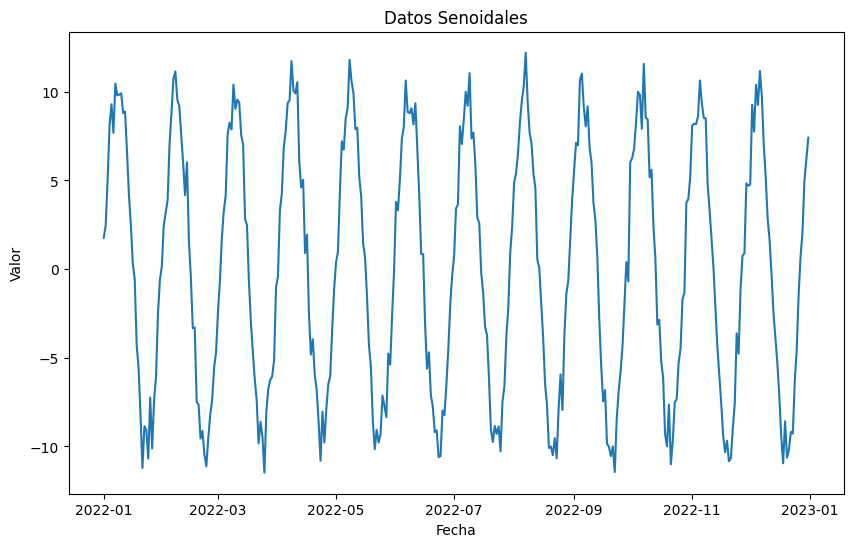

In [8]:
np.random.seed(0)
periodo = 30
t = np.arange(0, 365)
y = 10 * np.sin(2 * np.pi * t / periodo) + np.random.normal(0, 1, len(t))


data = pd.DataFrame({
    'ds': pd.date_range(start='2022-01-01', periods=len(t)),
    'y': y
})

plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'])
plt.title('Datos Senoidales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

09:29:47 - cmdstanpy - INFO - Chain [1] start processing
09:29:47 - cmdstanpy - INFO - Chain [1] done processing
d:\Iquall\Prophet\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
d:\Iquall\Prophet\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Iquall\Prophet\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m

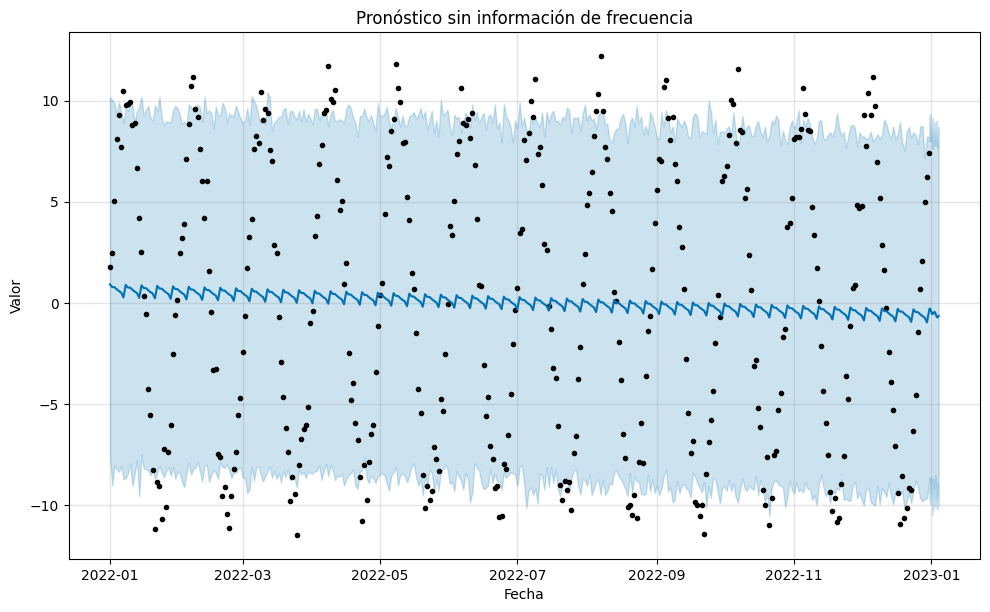

In [9]:
# Modelo sin información de frecuencia
model_no_freq = Prophet()
model_no_freq.fit(data)

# Crear un forecast
future_no_freq = model_no_freq.make_future_dataframe(periods=100,freq='H')
forecast_no_freq = model_no_freq.predict(future_no_freq)

# Visualización del forecast
fig_no_freq = model_no_freq.plot(forecast_no_freq)
plt.title('Pronóstico sin información de frecuencia')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

09:29:48 - cmdstanpy - INFO - Chain [1] start processing
09:29:48 - cmdstanpy - INFO - Chain [1] done processing
d:\Iquall\Prophet\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
d:\Iquall\Prophet\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Iquall\Prophet\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m

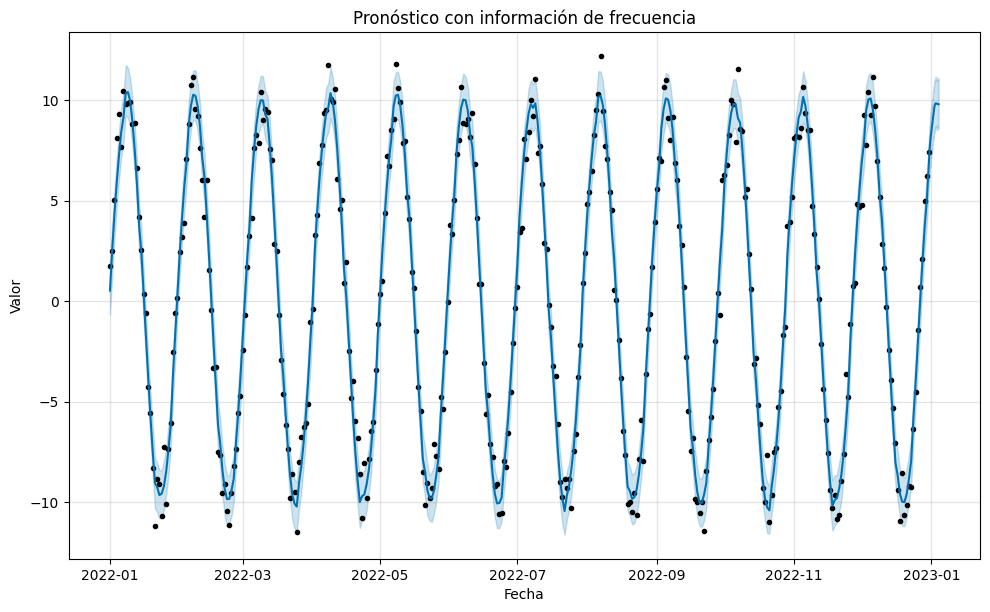

In [10]:
model_with_freq = Prophet(yearly_seasonality=False)
model_with_freq.add_seasonality(name='custom', period=periodo, fourier_order=5)
model_with_freq.fit(data)

# Crear un forecast
future_with_freq = model_with_freq.make_future_dataframe(periods=100,freq='H')
forecast_with_freq = model_with_freq.predict(future_with_freq)

# Visualización del forecast
fig_with_freq = model_with_freq.plot(forecast_with_freq)
plt.title('Pronóstico con información de frecuencia')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

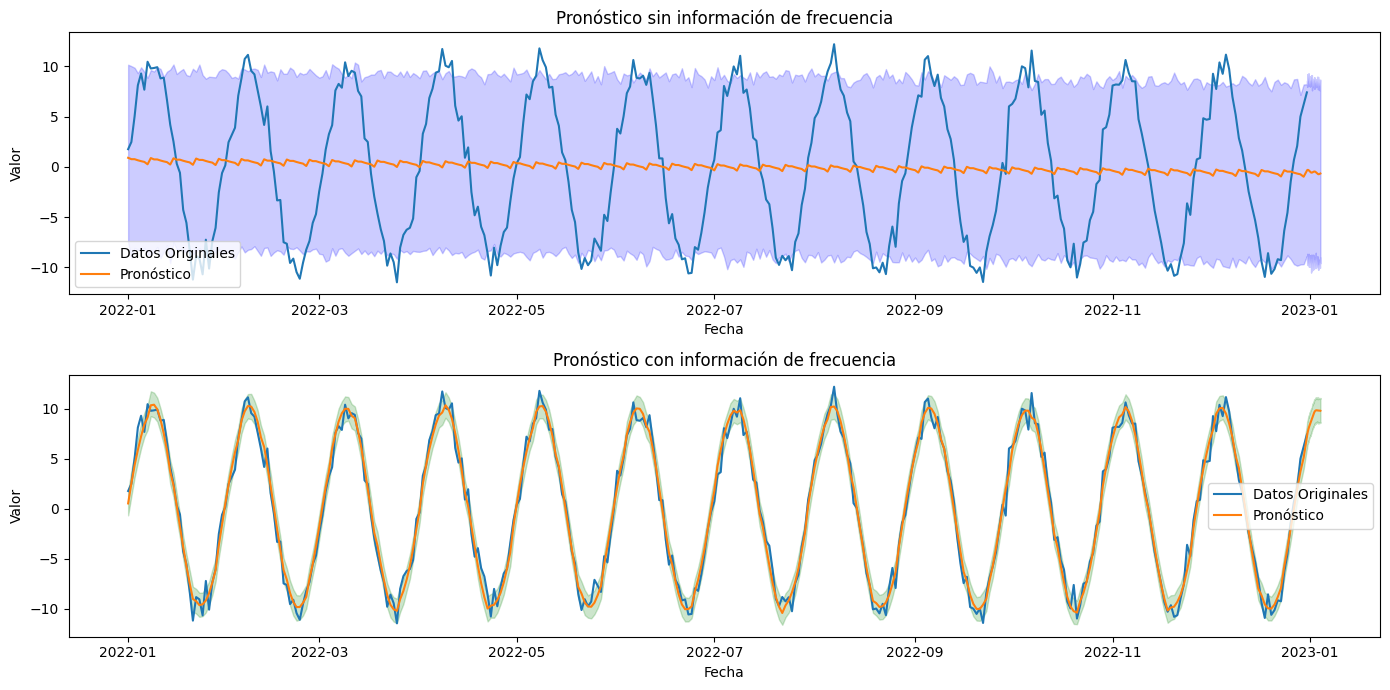

In [11]:

plt.figure(figsize=(14, 7))

# Sin información de frecuencia
plt.subplot(2, 1, 1)
plt.plot(data['ds'], data['y'], label='Datos Originales')
plt.plot(forecast_no_freq['ds'], forecast_no_freq['yhat'], label='Pronóstico')
plt.fill_between(forecast_no_freq['ds'], forecast_no_freq['yhat_lower'], forecast_no_freq['yhat_upper'], color='blue', alpha=0.2)
plt.title('Pronóstico sin información de frecuencia')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

# Con información de frecuencia
plt.subplot(2, 1, 2)
plt.plot(data['ds'], data['y'], label='Datos Originales')
plt.plot(forecast_with_freq['ds'], forecast_with_freq['yhat'], label='Pronóstico')
plt.fill_between(forecast_with_freq['ds'], forecast_with_freq['yhat_lower'], forecast_with_freq['yhat_upper'], color='green', alpha=0.2)
plt.title('Pronóstico con información de frecuencia')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

plt.tight_layout()
plt.show()

## DETECCION DE PRIMER ARMONICO

09:29:48 - cmdstanpy - INFO - Chain [1] start processing
09:29:48 - cmdstanpy - INFO - Chain [1] done processing
d:\Iquall\Prophet\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
d:\Iquall\Prophet\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Iquall\Prophet\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m

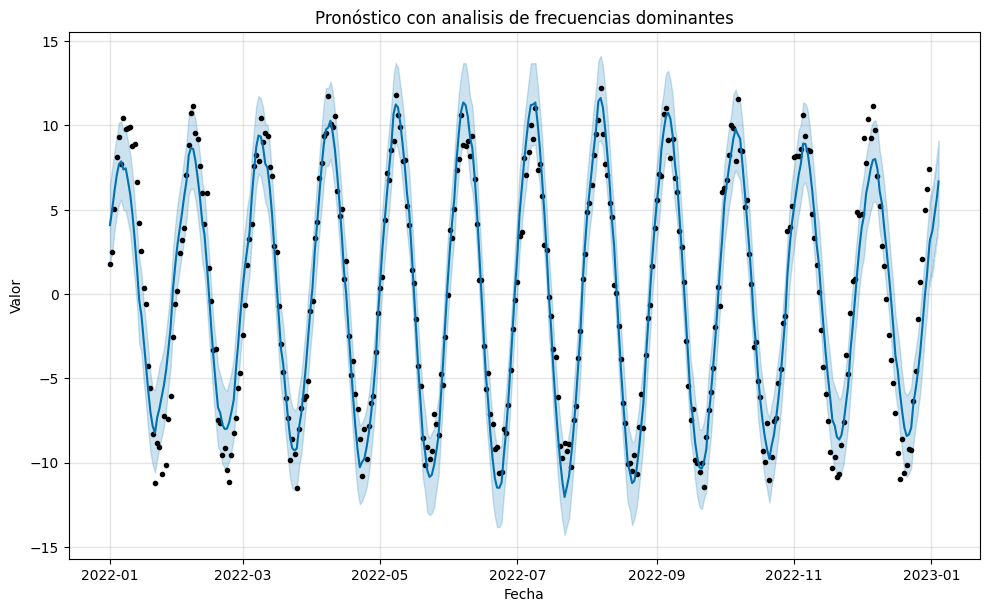

Frecuencias dominantes: [0.03287671 0.03561644]


In [12]:
def extract_frequencies_and_forecast(data, n_harmonics=1):
    # Extraer el componente de tiempo y la serie temporal
    t = np.arange(len(data))
    y = data['y'].values
    meam = data['y'].mean()
    y = y - meam
    # Aplicar la Transformada de Fourier
    yf = fft(y)
    xf = fftfreq(len(t), 1)[:len(t)//2]
    
    # Obtener las frecuencias dominantes, armonicos
    idx = np.argsort(np.abs(yf[:len(t)//2]))[::-1]
    dominant_freqs = xf[idx][:n_harmonics+1]
    
    # Construir el modelo Prophet
    model = Prophet(yearly_seasonality=False)
    for i, freq in enumerate(dominant_freqs):
        period = 1 / freq
        model.add_seasonality(name=f'custom_{i}', period=period, fourier_order=5)
    
    model.fit(data)
    
    # Crear un forecast
    future = model.make_future_dataframe(periods=100,freq='H')
    forecast = model.predict(future)
    
    # Visualización del forecast
    fig = model.plot(forecast)
    plt.title('Pronóstico con analisis de frecuencias dominantes')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.show()
    
    return forecast, dominant_freqs

# Generar datos senoidales 
np.random.seed(0)
periodo = 30
t = np.arange(0, 365)
y = 10 * np.sin(2 * np.pi * t / periodo) + np.random.normal(0, 1, len(t))

# Crear un DataFrame
data = pd.DataFrame({
    'ds': pd.date_range(start='2022-01-01', periods=len(t)),
    'y': y
})

# Aplicar la función al dataset
forecast, freqs = extract_frequencies_and_forecast(data, n_harmonics=1)
print(f"Frecuencias dominantes: {freqs}")